In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


# Fashion Classification

Build a model that can look into images and tell what the person is wearing like shorts, bags etc. and categories it into fashion classes

Fashion data consists of 70000 28x28 grayscale images
- 60000 training
- 10000 training

We would be having 10 target classes
- T-shirt/top
- Trouser
- Pullover
- Dress
- Coat
- Sandal
- Shirt
- Sneaker
- Bag
- Ankle Boot

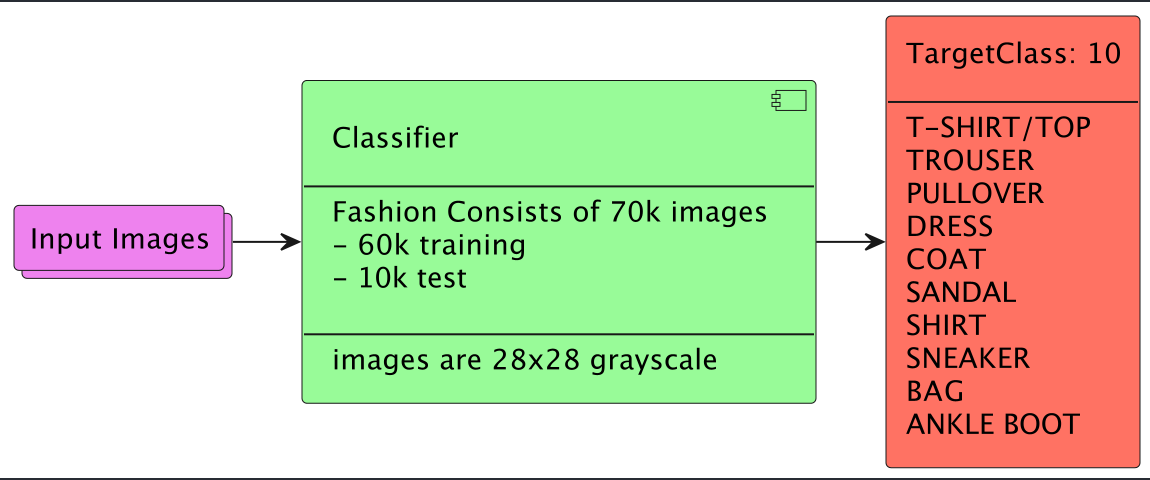

## What is an image?

- A grayscale image is system of 256 tones with values rangeing from 0-255
- '0' represents black and '255' represents white
- Numbers in b/w represents grays b/w black and white
- Binary systems use digits '0' and '1' where '00000000' for black, to '11111111' for white (8-bit image)
- **_Note_**: binary value of '11111111' is equal to decimal value of '255'


<div>
    <img src="https://shutha.org/sites/default/files//uploads/3_Courses/3_Digital_Imaging/02%20Dots1.jpg" width="150px"/>
    <img src="https://shutha.org/sites/default/files//uploads/3_Courses/3_Digital_Imaging/02%20Dots2.jpg" width="150px"/>
    <img src="https://shutha.org/sites/default/files//uploads/3_Courses/3_Digital_Imaging/02-06a.png" width="170px"/>
    <img src="https://shutha.org/sites/default/files//uploads/3_Courses/3_Digital_Imaging/02-08a.png" width="170px"/>
</div>


## Importing Data

### Import other libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Read data

In [4]:
df_fashion_train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv', sep=',')
df_fashion_test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv', sep=',')

## Visualizing the Data

### Data view

In [5]:
df_fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_fashion_train.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_fashion_train.shape

(60000, 785)

In [9]:
df_fashion_test.shape

(10000, 785)

In [10]:
training = np.array(df_fashion_train, dtype='float32')
testing = np.array(df_fashion_test, dtype='float32')

### Image view

7.0

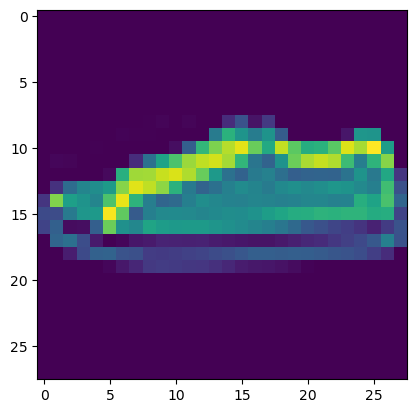

In [11]:
import random

i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28)) # skip 0 index =>label
label = training[i, 0]
label

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

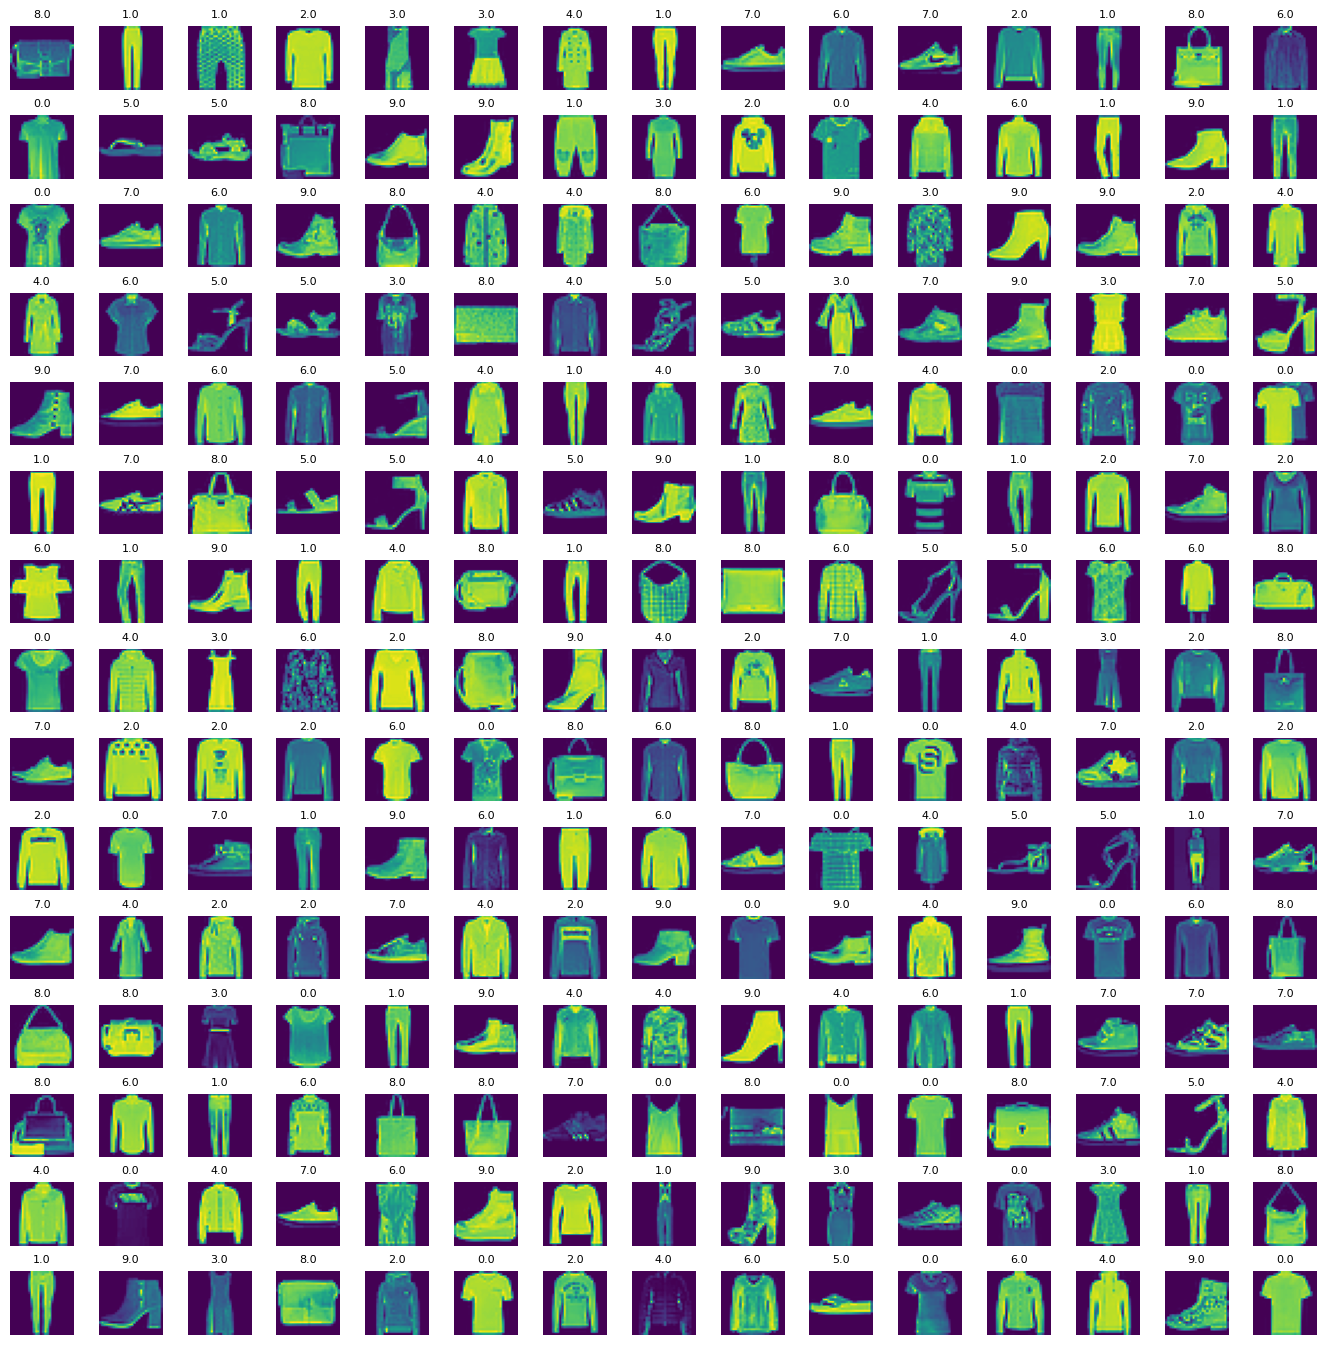

In [12]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17, 17))
axes = axes.ravel() #flatten the 15x15 matrix into 225 array

n_training = len(training)
for i in np.arange(0, W_grid*L_grid):
    index = np.random.randint(0, n_training)
    axes[i].imshow(training[index, 1:].reshape(28, 28))
    axes[i].set_title(training[index, 0], fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.4)

## Model Training

### Defining data for model training

#### Training and testing data

In [13]:
X_train = training[:, 1:]/255
y_train = training[:, 0]

X_test = testing[:, 1:]/255
y_test = testing[:, 0]

#### Validation data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

#### Reshape data in 3D 

In [16]:
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [17]:
print(X_train.shape)
print(X_test.shape)
print(X_validate.shape)

(48000, 28, 28, 1)
(10000, 28, 28, 1)
(12000, 28, 28, 1)


### CNN

We would be using [Convolution Neural network] (https://en.wikipedia.org/wiki/Convolutional_neural_network) for model training using Keras

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/1120px-Artificial_neural_network.svg.png?20110222105600" width="200px" />

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Typical_cnn.png/790px-Typical_cnn.png" width="800px" />

In [18]:
!pip install tensorflow

In [19]:
import keras

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [21]:
cnn_model = Sequential()

### CNN - Feature Detector
- Convolutions use a kernel matrix to scan a given image and apply a. filter to obtain a certain effect
- [An image Kernel](https://setosa.io/ev/image-kernels/) is a matrix used to apply effects such as blurring and sharpening
- Kernels are used in machine learning for feature extraction to select most important pixels of an image.
- Convolution preserves the spatial relationship between pixels.

### CNN - Rectified Linear Units

- RELU Layers are used to add non-linearity in the feature map
- It also enhances the sparsity or how scattered the feature map is
- The gradient of RELU does not vanish as we increase x compared to the sigmoid function

<img src="https://media.licdn.com/dms/image/C5112AQHE-DtEa5wCHw/article-inline_image-shrink_1000_1488/0/1551339801682?e=1697673600&v=beta&t=Mszq2rgxgcrcNcalnrAujXyIbf10J9320hTe77wtTv8" width="600px" />

In [22]:
cnn_model.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1), activation = 'relu'))

### CNN - MaxPooling/Flattening
- Pooling or down sampling layers are placed after convolutional layers to reduce feature map dimensionality
- This improves the computational efficiency while preserving the features
- Pooling helps the model to generalize by avoiding overfitting. If one of the pixel is shifted, the pooled feature map will still be the same
- Max pooling works by retaining the maximum feature response within a given sample size in feature map

Live illustration - https://adamharley.com/nn_vis/cnn/2d.html

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20190721025744/Screenshot-2019-07-21-at-2.57.13-AM.png" width="500px" />

<img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/flattening.png" width="400px" />

In [23]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

In [24]:
cnn_model.add(Flatten())

In [25]:
cnn_model.add(Dense(units = 64, activation='relu'))
cnn_model.add(Dense(units = 10, activation='sigmoid'))

### Training


**Sparse_categorical_crossentropy** is a loss function used in multi-class classification problems, where the target values are integers representing the class labels

**Adam optimization** is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.

In [26]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics='accuracy')

In [27]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 32)          320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 32)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 64)                32832     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 33,802
Trainable params: 33,802
Non-trainable params: 0
____________________________________________________

In [28]:
epochs = 50

cnn_model.fit(X_train,
              y_train,
              epochs=epochs,
              verbose=1,
              batch_size=512,
              validation_data=(X_validate, y_validate))

Epoch 1/50
94/94 [==============================] - 3s 21ms/step - loss: 1.2876 - accuracy: 0.5897 - val_loss: 0.7412 - val_accuracy: 0.7333
Epoch 2/50
94/94 [==============================] - 2s 18ms/step - loss: 0.6585 - accuracy: 0.7595 - val_loss: 0.5998 - val_accuracy: 0.7817
Epoch 3/50
94/94 [==============================] - 2s 19ms/step - loss: 0.5650 - accuracy: 0.7930 - val_loss: 0.5397 - val_accuracy: 0.8025
Epoch 4/50
94/94 [==============================] - 2s 19ms/step - loss: 0.5177 - accuracy: 0.8126 - val_loss: 0.5047 - val_accuracy: 0.8177
Epoch 5/50
94/94 [==============================] - 2s 17ms/step - loss: 0.4868 - accuracy: 0.8236 - val_loss: 0.4808 - val_accuracy: 0.8266
Epoch 6/50
94/94 [==============================] - 2s 17ms/step - loss: 0.4660 - accuracy: 0.8332 - val_loss: 0.4657 - val_accuracy: 0.8319
Epoch 7/50
94/94 [==============================] - 2s 18ms/step - loss: 0.4503 - accuracy: 0.8368 - val_loss: 0.4503 - val_accuracy: 0.8381
Epoch 8/50
94

## Model Evaluation

In [29]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.3337 - accuracy: 0.8734
Test Accuracy: 0.873


In [30]:
X_predict = cnn_model.predict(X_test) 
predicted_classes = np.argmax(X_predict, axis=1)

313/313 [==============================] - 1s 2ms/step


In [31]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

In [32]:
def ctype(cid: int) -> str:
    if cid == 0: return 'Top'
    if cid == 1: return 'Trouser'
    if cid == 2: return 'Pullover'
    if cid == 3: return 'Dress'
    if cid == 4: return 'Coat'
    if cid == 5: return 'Sandal'
    if cid == 6: return 'Shirt'
    if cid == 7: return 'Sneaker'
    if cid == 8: return 'Bag'
    if cid == 9: return 'Ankle boot'
    return 'None'

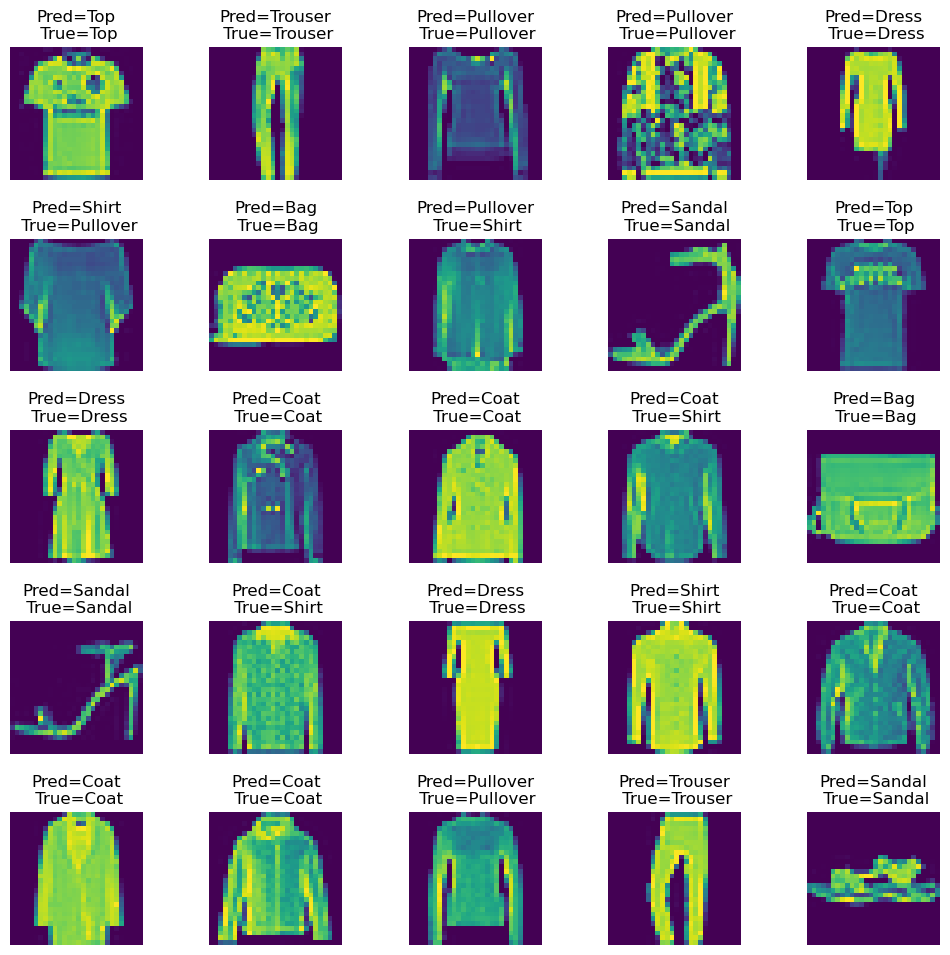

In [33]:
W = 5
L = 5

fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel() #flatten the 15x15 matrix into 225 array

for index in np.arange(0, L*W):
    predicted_ctype = ctype(predicted_classes[index])
    actual_ctype = ctype(y_test[index])
    axes[index].imshow(X_test[index].reshape(28, 28))
    axes[index].set_title('Pred={}\n True={}'.format(predicted_ctype, actual_ctype))
    axes[index].axis('off')
    
plt.subplots_adjust(wspace=0.5)

<Axes: >

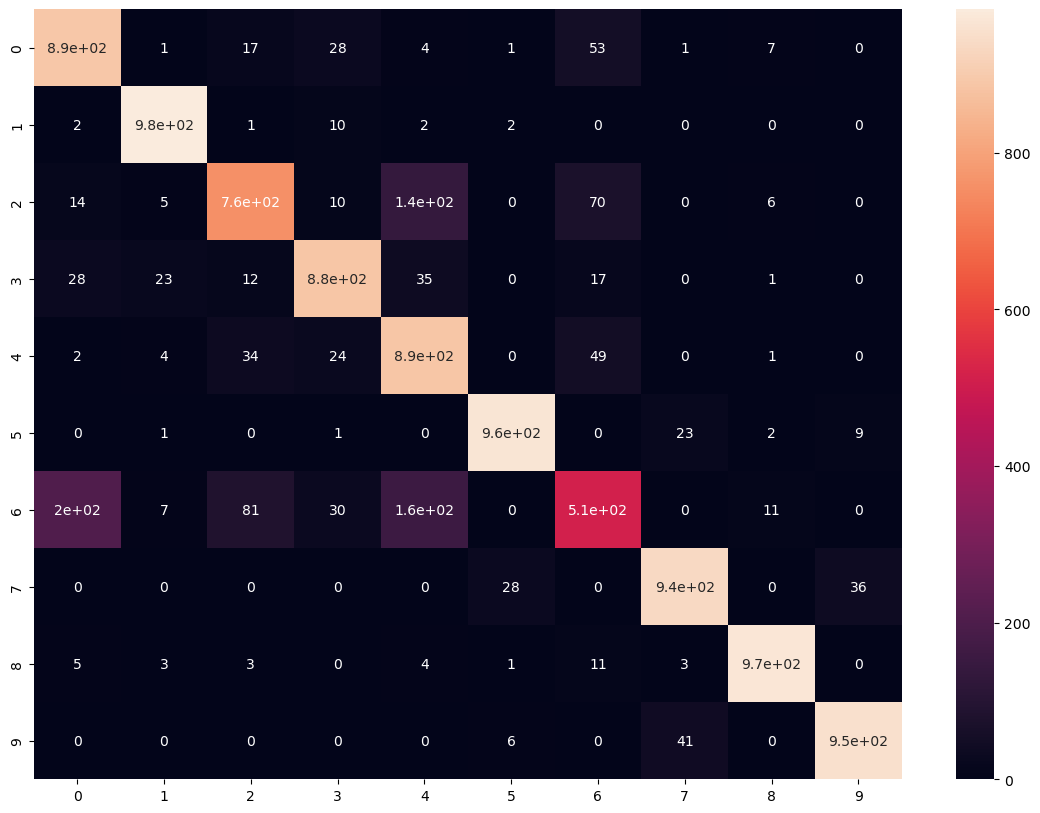

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot=True)

In [35]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ['{}: {}'.format(i, ctype(i)) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

               precision    recall  f1-score   support

       0: Top       0.78      0.89      0.83      1000
   1: Trouser       0.96      0.98      0.97      1000
  2: Pullover       0.84      0.76      0.80      1000
     3: Dress       0.90      0.88      0.89      1000
      4: Coat       0.72      0.89      0.80      1000
    5: Sandal       0.96      0.96      0.96      1000
     6: Shirt       0.72      0.51      0.60      1000
   7: Sneaker       0.93      0.94      0.93      1000
       8: Bag       0.97      0.97      0.97      1000
9: Ankle boot       0.95      0.95      0.95      1000

     accuracy                           0.87     10000
    macro avg       0.87      0.87      0.87     10000
 weighted avg       0.87      0.87      0.87     10000



## Improving models

### CNN - Increase Filters/Dropout

- Improve accuracy by adding more features detectors/filters or adding a dropout
- Dropout refers to dropping out units in a neural network
- Neurons develop co-dependency amongst each other during training
- Dropout is a regularization technique for reducing overfitting in neural networks
- It enables training to occur on several architectures of the neural network

<img src="https://miro.medium.com/max/1400/1*S-Rr9boTfKusUzETeKW6Mg.png" width="500px" />